## INDUSTRIAL ENERGY CONSUMPTION FORECASTING

### Loading the Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### Read the dataset

In [2]:
Industrial_new = pd.read_excel('use_tot_sector.xlsx',sheet_name='Industrial Sector', header=1, index_col=0)

In [3]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Industrial_new.columns = Industrial_new.iloc[0]
Industrial = Industrial_new[1:-1]
print(Industrial)

State     1960     1961     1962     1963     1964     1965     1966     1967  \
AK       16798    21748    25143    25950    25841    23107    33820    35548   
AL      508500   473290   497504   505064   558585   614582   642039   681691   
AR      204729   199953   216451   230995   255283   255234   257650   277382   
AZ       50359    81565    97937   105519   100297   119098   131975   119078   
CA     1193589  1209024  1214818  1325160  1454644  1475421  1558212  1610012   
CO      171462   189742   180950   180415   184883   185681   176595   192775   
CT      170379   168945   180334   181031   202315   194943   222567   221316   
DC       34470    33890    33092    31234    34236    43985    51565    54130   
DE       66475    62451    72557    78026    79214    85763    90115    86048   
FL      225674   239313   262710   272756   284752   309445   328754   317977   
GA      262469   266590   293886   306865   334512   376959   408572   423628   
HI       20617    26809    2

### Load the state abbrevation and divide the years to 6 decades.

In [33]:
# state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Industrial_1960_1970 = Industrial.loc[:, '1960':'1970']
Industrial_1970_1980 = Industrial.loc[:, '1971':'1980']
Industrial_1980_1990 = Industrial.loc[:, '1981':'1990']
Industrial_1990_2000 = Industrial.loc[:, '1991':'2000']
Industrial_2000_2010 = Industrial.loc[:, '2001':'2010']
Industrial_2010_2020 = Industrial.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Industrial_1960_1970.mean(axis=1)
average_1970_1980 = Industrial_1970_1980.mean(axis=1)
average_1980_1990 = Industrial_1980_1990.mean(axis=1)
average_1990_2000 = Industrial_1990_2000.mean(axis=1)
average_2000_2010 = Industrial_2000_2010.mean(axis=1)
average_2010_2020 = Industrial_2010_2020.mean(axis=1)

### Load the states abbrevations and divide the years to 6 decades.

In [34]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places 
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 31526.73
State: Alabama - Value: 615307.45
State: Arkansas - Value: 255398.09
State: Arizona - Value: 112122.91
State: California - Value: 1487211.73
State: Colorado - Value: 191989.0
State: Connecticut - Value: 197516.36
State: District of Columbia - Value: 44678.55
State: Delaware - Value: 83616.82
State: Florida - Value: 299048.18
State: Georgia - Value: 367329.27
State: Hawaii - Value: 33723.82
State: Iowa - Value: 258322.64
State: Idaho - Value: 117020.45
State: Illinois - Value: 1289343.27
State: Indiana - Value: 1042256.91
State: Kansas - Value: 292584.45
State: Kentucky - Value: 500995.45
State: Louisiana - Value: 1452047.45
State: Massachusetts - Value: 336633.45
State: Maryland - Value: 364722.0
State: Maine - Value: 87089.55
State: Michigan - Value: 978234.55
State: Minnesota - Value: 332569.09
State: Missouri - Value: 351328.73
State: Mississippi - Value: 224011.91
State: Montana - Value: 135019.73
State: North Carolina - Va

### Average for 1960 to 1970 and dividing it into 5 clusters

In [35]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1960-1970') 
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Industrial_1960_1970.csv', index=True)



States in Cluster 0:
State: VT - Value: 17670.73
State: AK - Value: 31526.73
State: HI - Value: 33723.82
State: NV - Value: 33745.55
State: NH - Value: 39573.36
State: SD - Value: 39774.36
State: DC - Value: 44678.55
State: RI - Value: 51537.64
State: ND - Value: 75990.82
State: DE - Value: 83616.82
State: ME - Value: 87089.55
State: WY - Value: 104560.73
State: NE - Value: 104729.36
State: AZ - Value: 112122.91
State: ID - Value: 117020.45
State: MT - Value: 135019.73
State: UT - Value: 175603.18
State: NM - Value: 177327.09
State: CO - Value: 191989.0
State: CT - Value: 197516.36
State: MS - Value: 224011.91
State: OR - Value: 245178.91
State: AR - Value: 255398.09
State: IA - Value: 258322.64
State: SC - Value: 262015.36
Cluster 0 Range: 17670.73 - 262015.36

States in Cluster 1:
State: KS - Value: 292584.45
State: FL - Value: 299048.18
State: MN - Value: 332569.09
State: MA - Value: 336633.45
State: VA - Value: 350883.55
State: MO - Value: 351328.73
State: OK - Value: 352621.09
St

### Mapping using Tablaue 

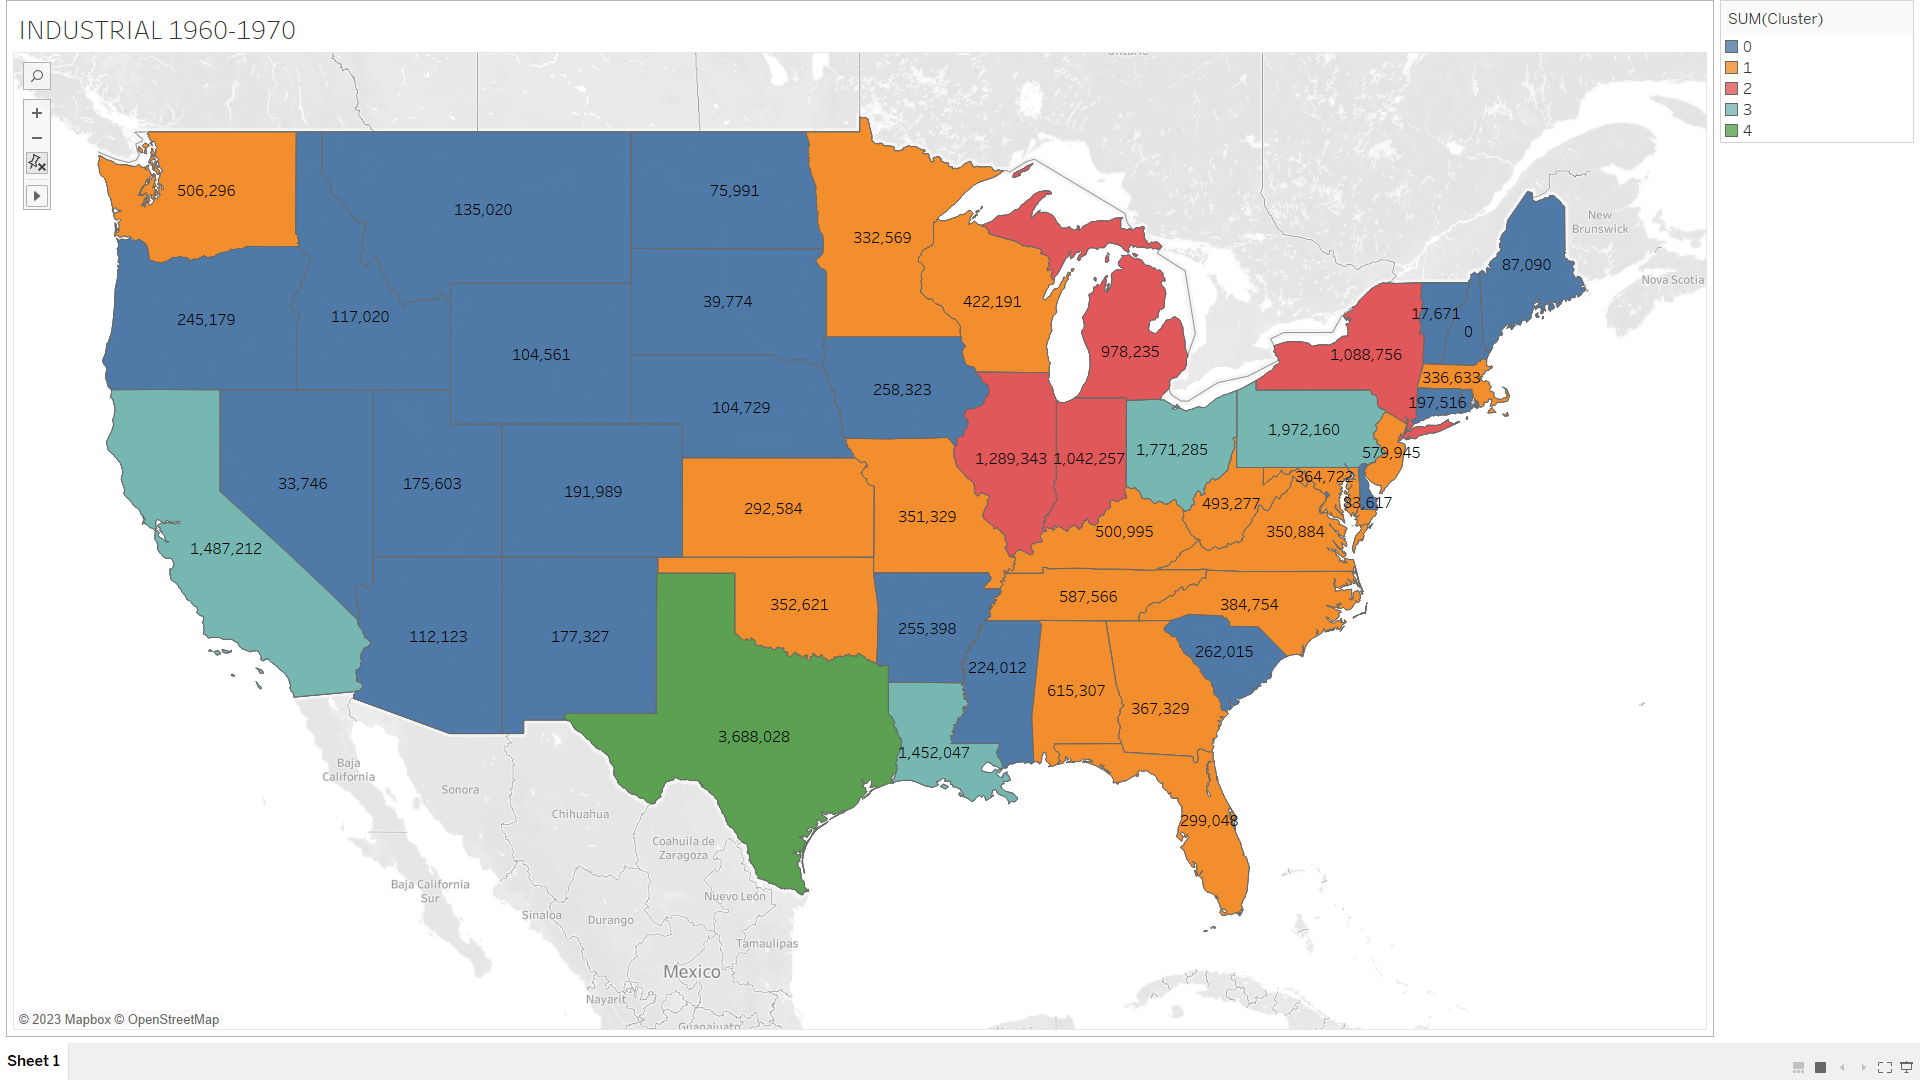

### Average for 1970 to 1980 and dividing it into 5 clusters

In [36]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980')  
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Industrial_1970-1980.csv', index=True)



States in Cluster 0:
State: VT - Value: 27687.4
State: SD - Value: 46492.2
State: DC - Value: 47774.3
State: RI - Value: 53045.5
State: HI - Value: 53450.2
State: NV - Value: 56171.9
State: NH - Value: 63315.7
State: ND - Value: 74039.8
State: AK - Value: 94915.7
State: DE - Value: 99966.7
State: ME - Value: 145488.3
State: ID - Value: 146761.6
State: NE - Value: 153190.4
State: MT - Value: 171411.8
State: WY - Value: 182414.7
State: NM - Value: 184917.8
State: CT - Value: 189530.4
State: AZ - Value: 193630.8
State: UT - Value: 218878.7
State: CO - Value: 243088.6
Cluster 0 Range: 27687.40 - 243088.60

States in Cluster 1:
State: MA - Value: 309909.9
State: MS - Value: 324764.5
State: OR - Value: 328184.9
State: IA - Value: 341535.3
State: AR - Value: 355808.9
State: VA - Value: 382454.9
State: SC - Value: 382740.2
State: KS - Value: 397967.4
State: MO - Value: 405716.7
State: MD - Value: 420290.5
State: FL - Value: 459817.3
State: MN - Value: 464951.9
State: WV - Value: 477985.5
Stat

### Mapping using Tablaue

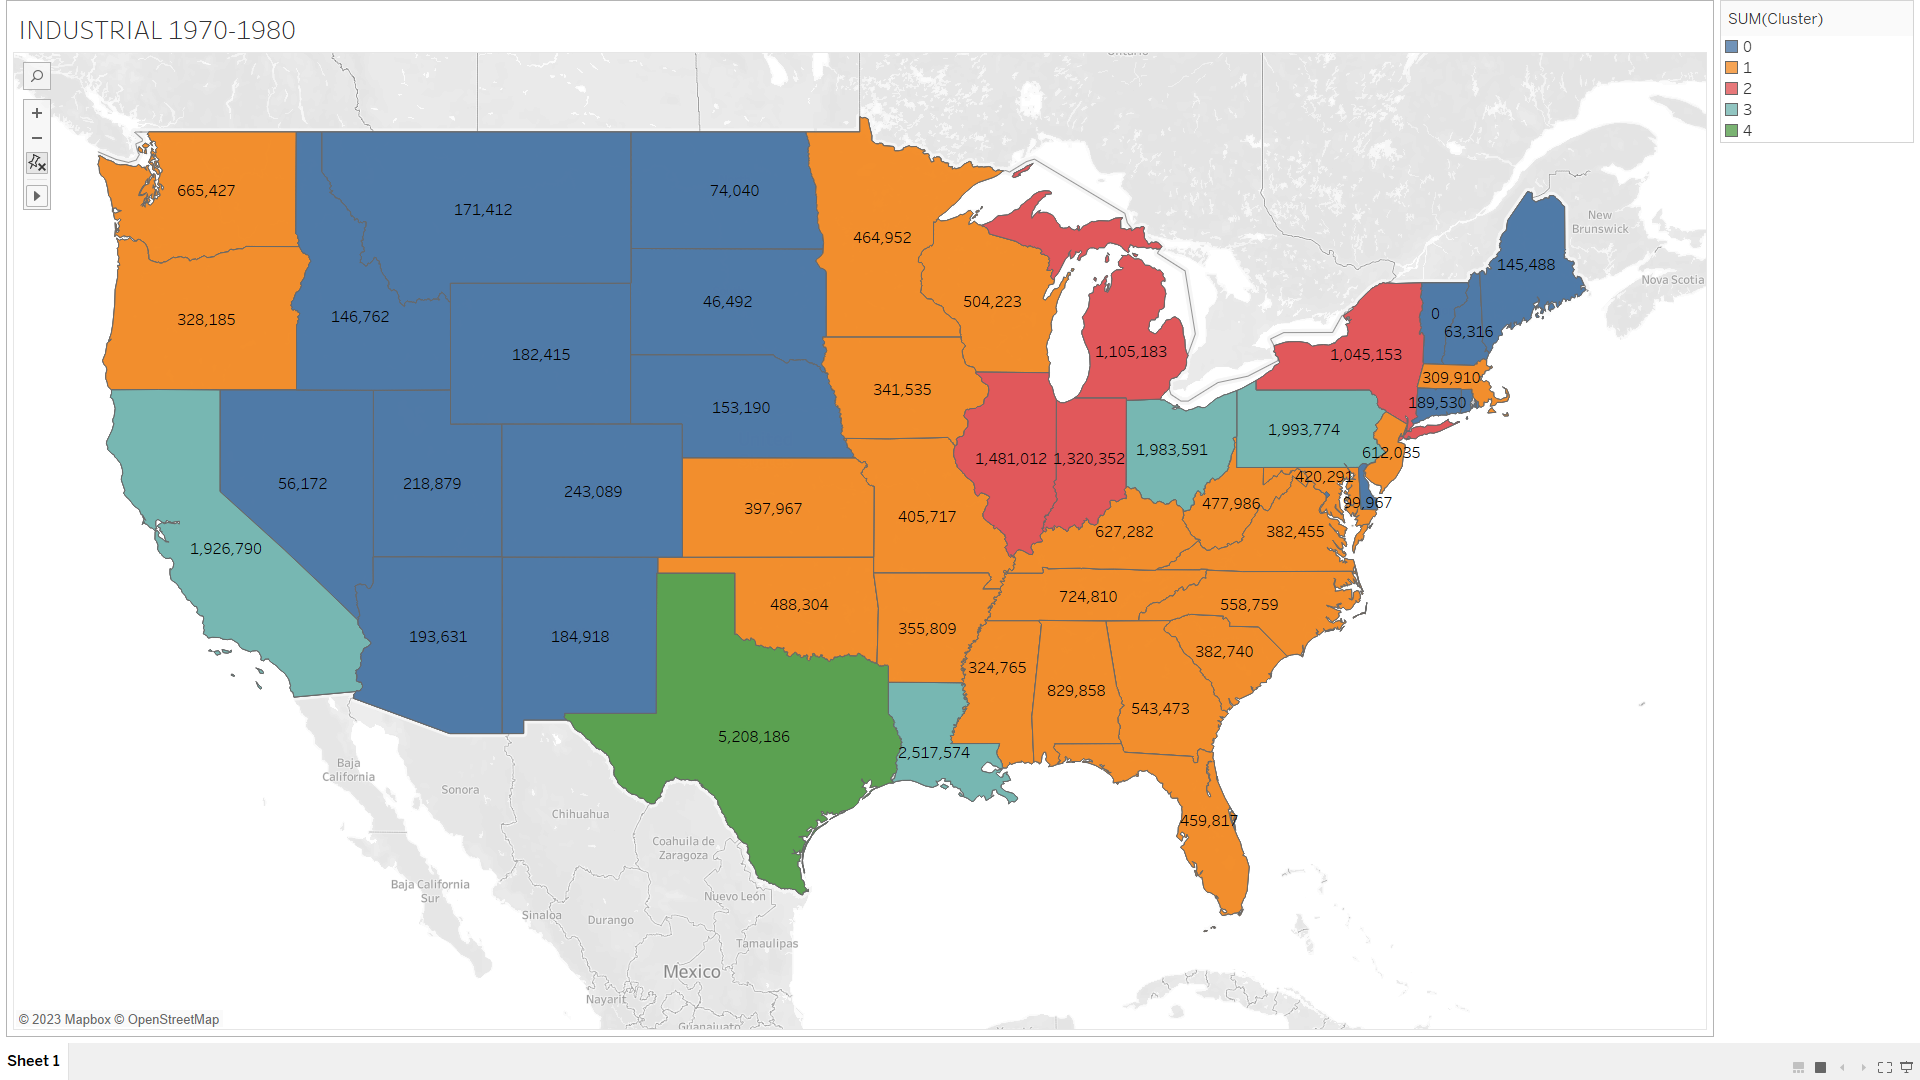

### Average for 1980 to 1990 and dividing it into 5 clusters

In [37]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990')  
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Industrial_1980-1990.csv', index=True)



States in Cluster 0:
State: VT - Value: 33685.9
State: DC - Value: 34387.9
State: RI - Value: 38669.0
State: SD - Value: 49680.4
State: NH - Value: 68124.1
State: HI - Value: 78934.6
State: NV - Value: 82332.5
State: DE - Value: 84684.9
State: ND - Value: 125616.6
State: NE - Value: 127227.5
State: ID - Value: 138693.0
State: MT - Value: 144076.9
State: CT - Value: 145680.2
State: NM - Value: 158686.1
State: UT - Value: 187494.0
State: CO - Value: 189654.3
State: AZ - Value: 194042.5
State: ME - Value: 202017.9
State: WY - Value: 210031.0
State: AK - Value: 233627.7
State: MA - Value: 246848.0
State: OR - Value: 331575.4
State: AR - Value: 333349.2
State: MO - Value: 336284.5
State: MS - Value: 339201.1
State: WV - Value: 345802.3
State: IA - Value: 363327.0
Cluster 0 Range: 33685.90 - 363327.00

States in Cluster 1:
State: KS - Value: 389230.8
State: MD - Value: 402009.6
State: MN - Value: 449341.0
State: VA - Value: 474354.0
State: FL - Value: 476744.5
State: SC - Value: 478642.9
St

### Mapping Using Tablaue

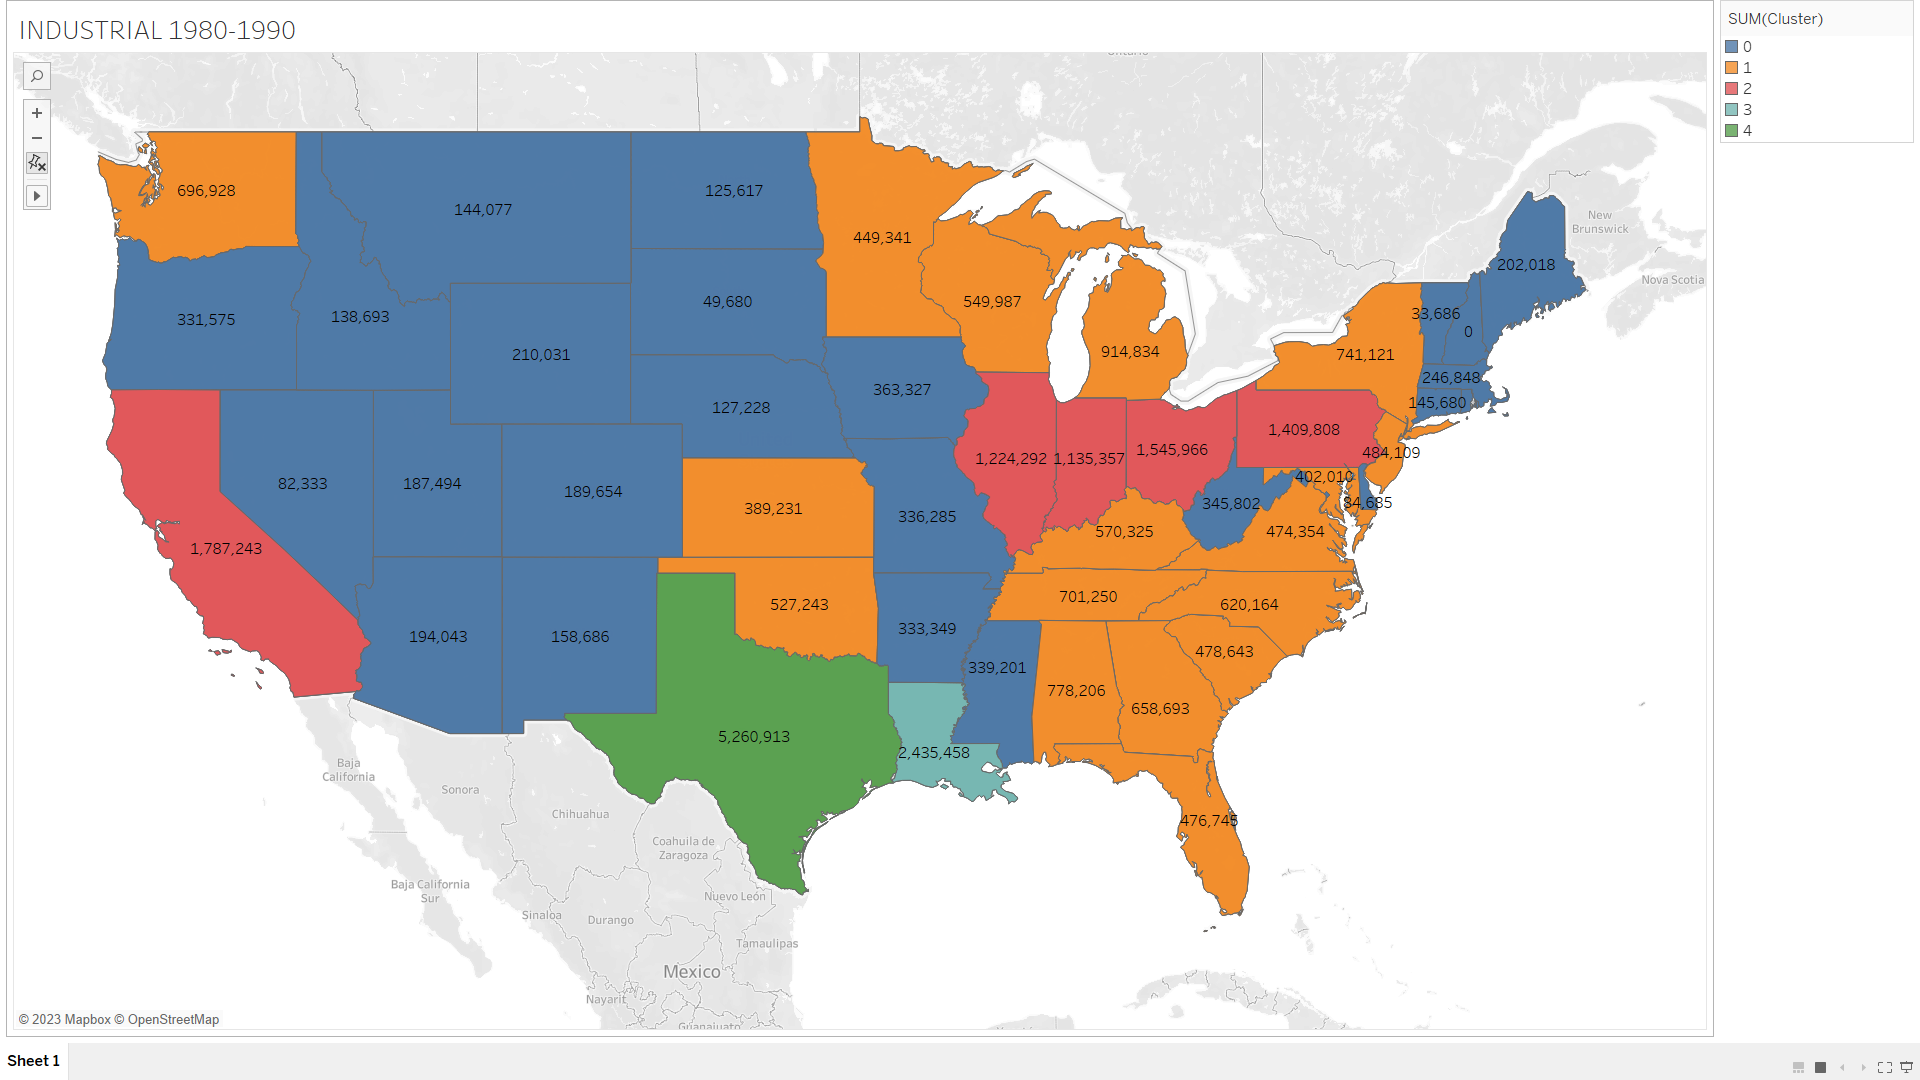

### Average for 1990 to 2000 and dividing it into 5 clusters

In [38]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000') 
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Industrial_1990-2000.csv', index=True)



States in Cluster 0:
State: DC - Value: 13899.1
State: VT - Value: 25365.0
State: RI - Value: 52332.8
State: NH - Value: 56468.5
State: SD - Value: 61823.8
State: HI - Value: 88213.1
State: DE - Value: 104912.5
State: CT - Value: 130729.4
State: NV - Value: 148396.1
State: MT - Value: 161034.9
State: ND - Value: 175630.1
State: NE - Value: 175847.4
State: ID - Value: 189754.2
State: NM - Value: 200742.7
State: ME - Value: 203588.9
State: AZ - Value: 222315.8
State: MA - Value: 228293.8
State: UT - Value: 232832.7
State: WY - Value: 237310.7
State: CO - Value: 275755.9
State: MD - Value: 309300.7
State: WV - Value: 312449.0
State: OR - Value: 341579.5
State: MO - Value: 358530.9
State: AK - Value: 387063.6
State: KS - Value: 415343.8
State: AR - Value: 429013.2
State: MS - Value: 445777.7
Cluster 0 Range: 13899.10 - 445777.70

States in Cluster 1:
State: IA - Value: 461616.1
State: NJ - Value: 520020.7
State: OK - Value: 550899.7
State: VA - Value: 561515.1
State: FL - Value: 575315.6


### Mapping Using Tablaue

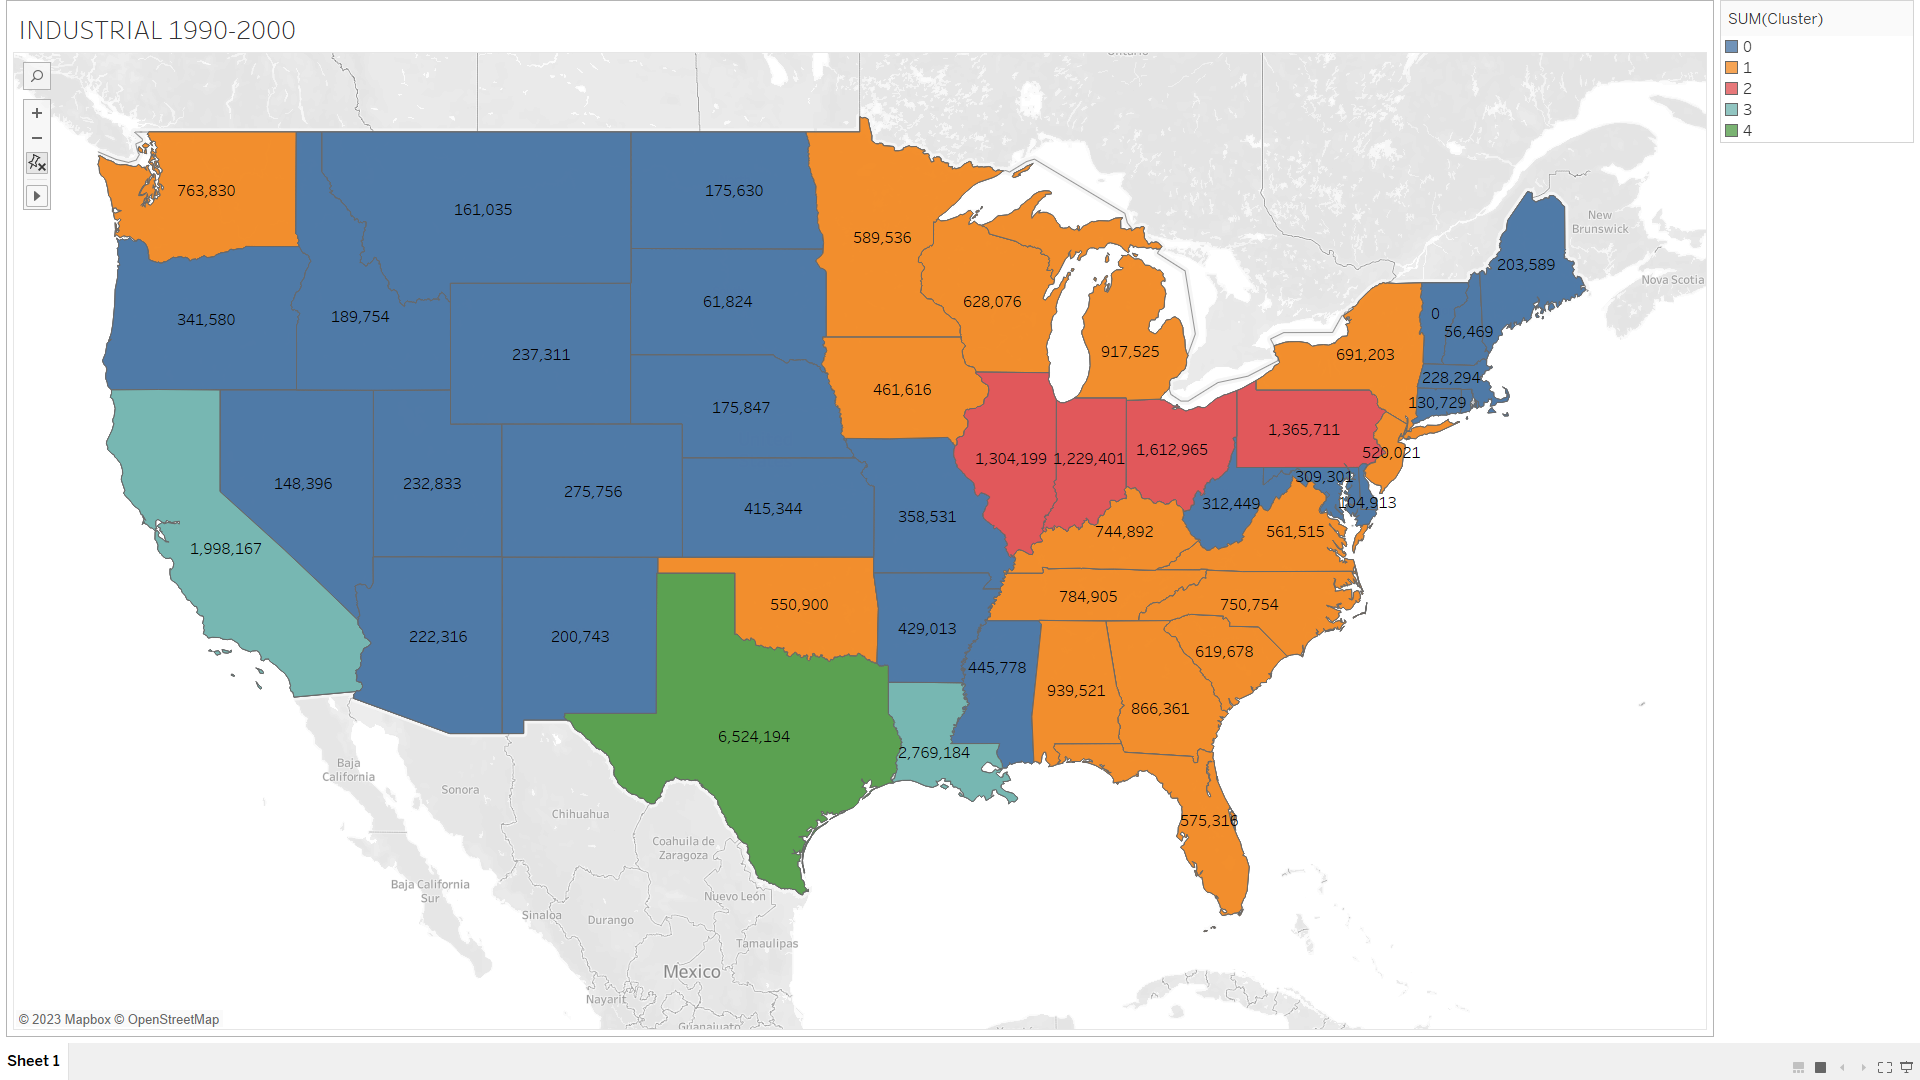

### Average for 2000 to 2010 and dividing it into 5 clusters

In [39]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Industrial_2000-2010.csv', index=True)



States in Cluster 0:
State: DC - Value: 4833.2
State: RI - Value: 24037.0
State: VT - Value: 26754.1
State: NH - Value: 46715.9
State: HI - Value: 69390.4
State: DE - Value: 91236.9
State: SD - Value: 99263.3
State: CT - Value: 105429.1
State: MT - Value: 148352.7
State: ME - Value: 156113.5
State: NV - Value: 178261.4
State: ID - Value: 181902.3
State: ND - Value: 205153.4
State: MA - Value: 207926.6
State: UT - Value: 211245.0
State: AZ - Value: 214553.7
State: NM - Value: 220265.9
State: NE - Value: 263291.9
State: OR - Value: 264709.4
State: WY - Value: 264723.8
State: MD - Value: 269859.8
State: WV - Value: 303283.0
State: NJ - Value: 362425.1
State: AK - Value: 372125.0
Cluster 0 Range: 4833.20 - 372125.00

States in Cluster 1:
State: KS - Value: 386979.1
State: CO - Value: 395510.7
State: MO - Value: 398446.8
State: MS - Value: 418719.8
State: AR - Value: 429614.1
State: NY - Value: 462129.1
State: WA - Value: 510820.6
State: VA - Value: 525323.2
State: FL - Value: 526544.8
Sta

### Mapping Using Tablaue

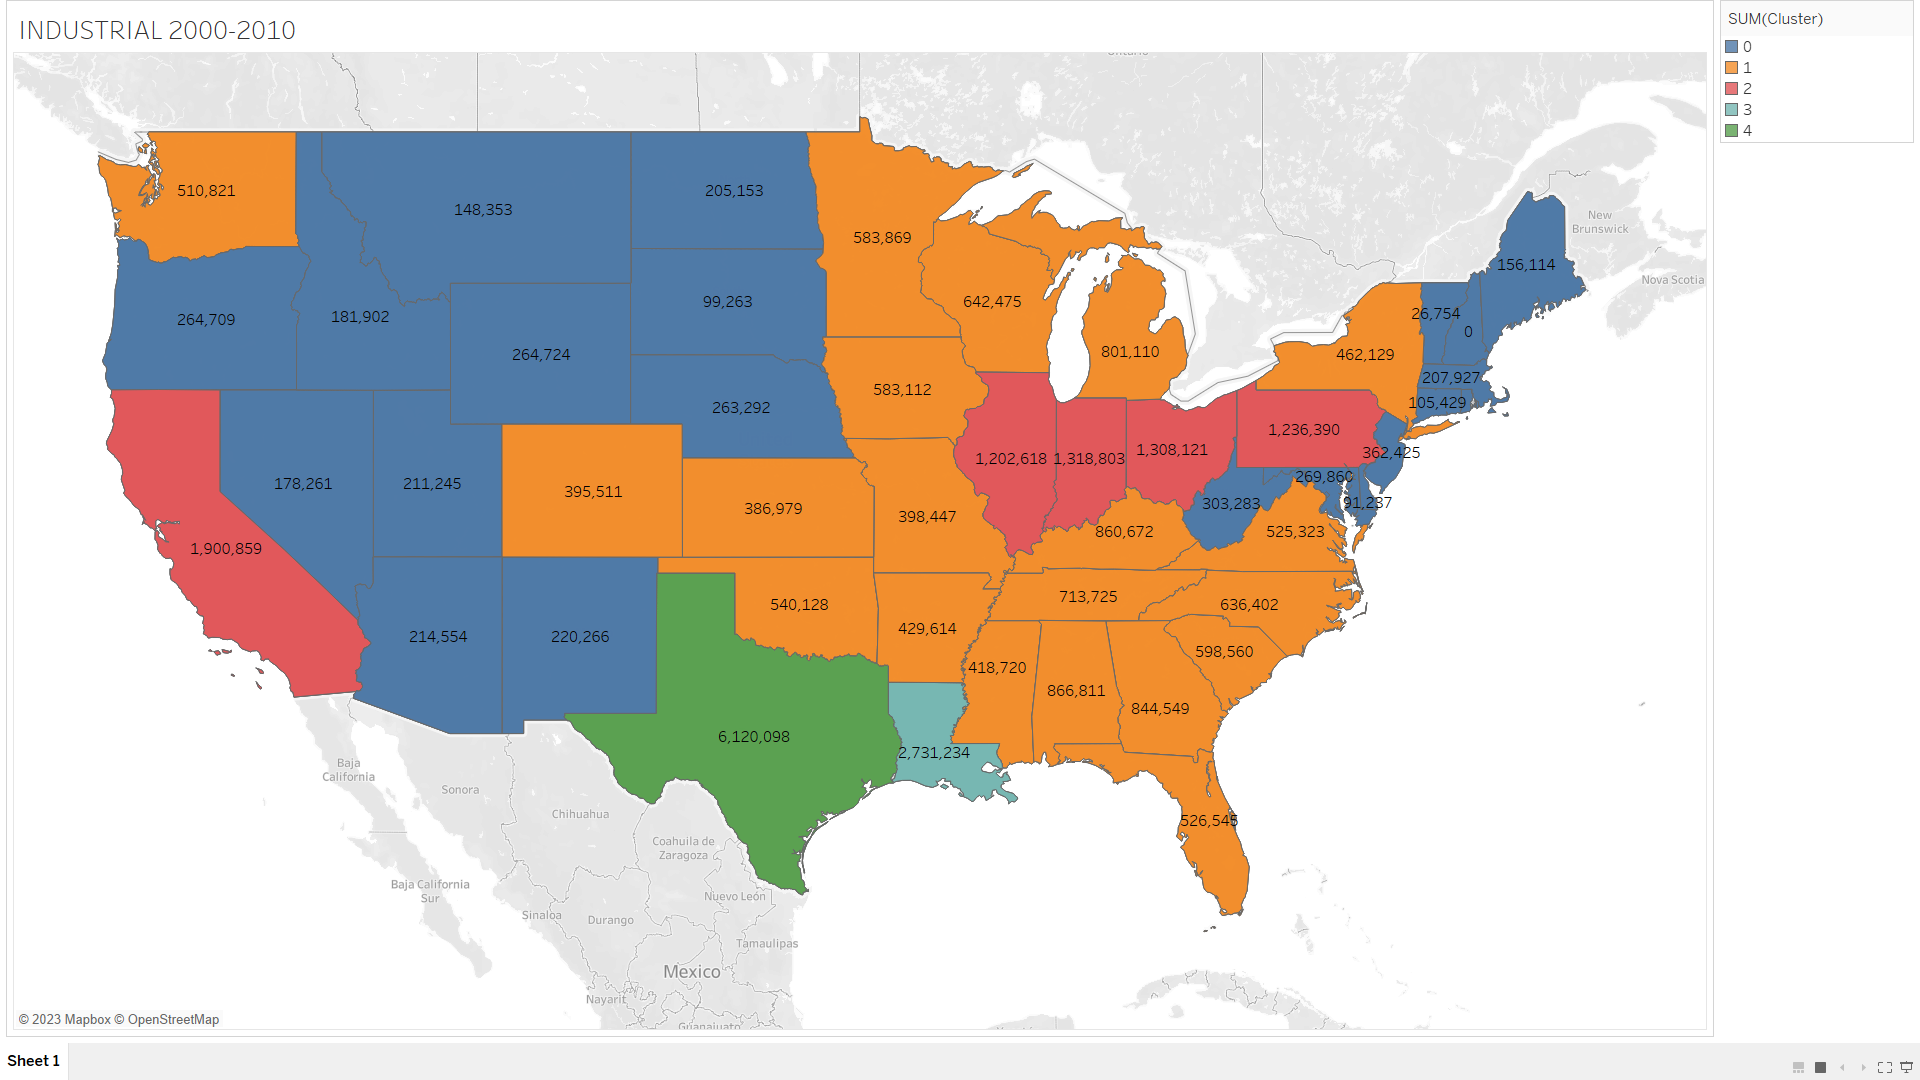

### Average for 2010 to 2020 and dividing it into 5 clusters

In [40]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Industrial_2010-2020.csv', index=True)



States in Cluster 0:
State: DC - Value: 6200.6
State: VT - Value: 19614.1
State: RI - Value: 23499.4
State: NH - Value: 41690.4
State: HI - Value: 61019.4
State: CT - Value: 80200.0
State: DE - Value: 87326.0
State: MD - Value: 111385.2
State: ME - Value: 120542.1
State: MT - Value: 128004.3
State: SD - Value: 159637.4
State: NV - Value: 169879.9
State: ID - Value: 173808.5
State: MA - Value: 181698.8
State: UT - Value: 225984.7
State: AZ - Value: 228301.0
State: NM - Value: 229223.3
State: OR - Value: 257212.0
State: NJ - Value: 261757.1
State: WY - Value: 309295.9
State: ND - Value: 321589.6
State: WV - Value: 327247.4
State: MO - Value: 330841.9
State: AK - Value: 336381.1
Cluster 0 Range: 6200.60 - 336381.10

States in Cluster 1:
State: NE - Value: 378454.5
State: NY - Value: 381482.2
State: KS - Value: 382857.5
State: MS - Value: 399440.7
State: AR - Value: 399761.3
State: CO - Value: 421058.0
State: VA - Value: 443338.1
State: FL - Value: 479926.3
State: SC - Value: 532178.2
Sta

### Mapping Using Tablaue

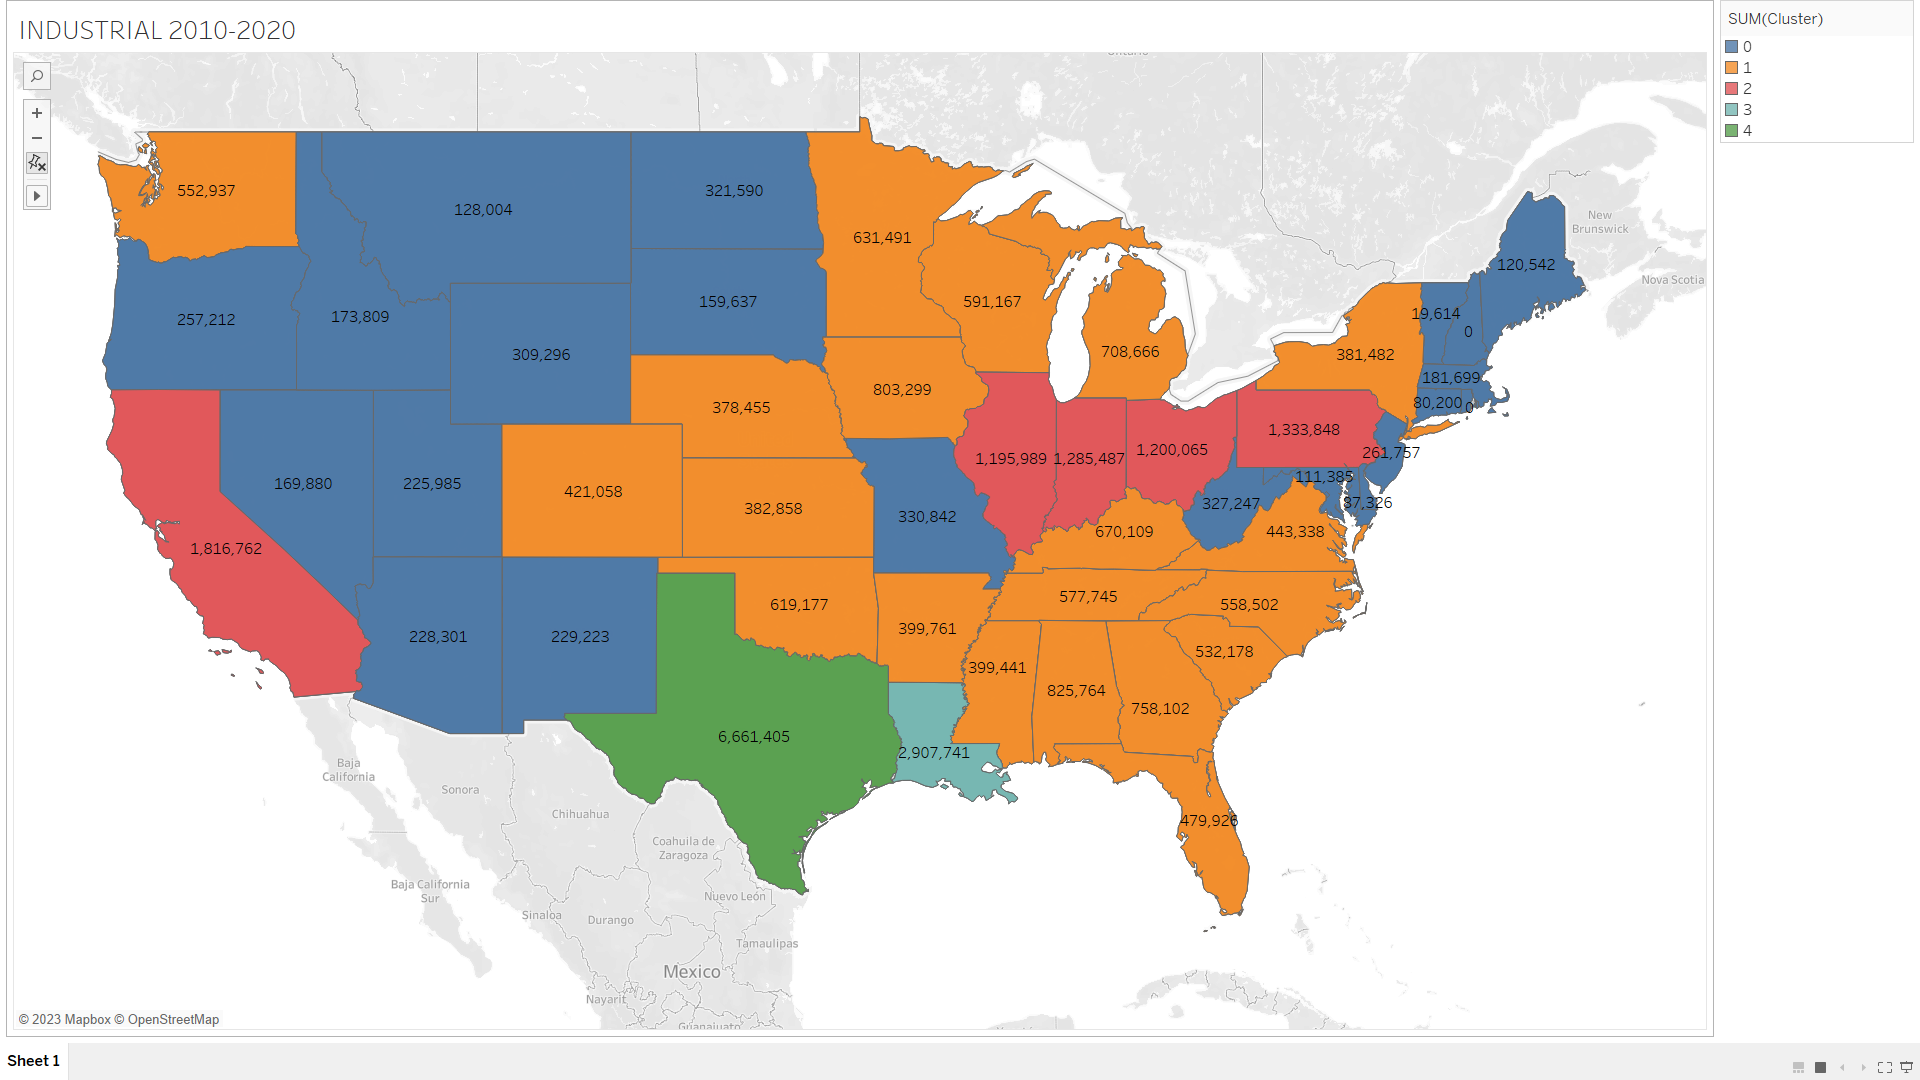

### Progress of the states from 1960 to 1970

In [41]:
# Load the CSV file into a DataFrame
file_path = 'Industrial_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations
state_abbreviations = ['TX','LA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)

Information for states in the 1960-1970 interval:
     1960-1970  Cluster State Full Name
LA  1452047.45        3       Louisiana
TX  3688027.82        4           Texas


### Progress of the states from 1970 to 1980

In [42]:
# Load the CSV file into a DataFrame
file_path = 'Industrial_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

#list of state abbreviations 
state_abbreviations = ['TX','LA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)


Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
LA  2517574.1        3       Louisiana
TX  5208185.7        4           Texas


### Progress of the states from 1980 to 1990

In [43]:
# Load the CSV file into a DataFrame
file_path = 'Industrial_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations
state_abbreviations = ['TX','LA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
LA  2435457.5        3       Louisiana
TX  5260913.4        4           Texas


### Progress of the states from 1999 to 2000

In [44]:
# Load the CSV file into a DataFrame
file_path = 'Industrial_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations
state_abbreviations = ['TX','LA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
LA  2769184.1        3       Louisiana
TX  6524193.9        4           Texas


### Progress of the states from 2000 to 2010

In [45]:
# Load the CSV file into a DataFrame
file_path = 'Industrial_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations 
state_abbreviations = ['TX','LA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
LA  2731234.1        3       Louisiana
TX  6120098.2        4           Texas


### Progress of the states from 2010 to 2020

In [46]:
# Load the CSV file into a DataFrame
file_path = 'Industrial_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations
state_abbreviations = ['TX','LA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
LA  2907740.9        3       Louisiana
TX  6661404.8        4           Texas


### Plotting Using Matplot

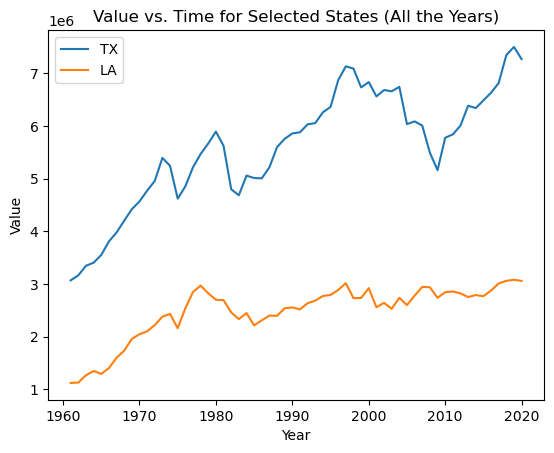

In [7]:
# Select only the 60 columns
Industrial_60 = Industrial.iloc[:, 1:61]

# Transpose the data to have years as rows and states as columns
Industrial_T_60 = Industrial_60.transpose()

# list of state abbreviations
state_abbreviations =  ['TX','LA']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Industrial_T_60.index, Industrial_T_60[state], label=state)

# Add x-labels
plt.xlabel('Year')
# Add y-labels
plt.ylabel('Value')
# Add title
plt.title('Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

## Deep Learning Forecasting 

### LSTM

In [4]:
# sequence length and accuracy threshold
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01  

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {} 

for state in ['TX','LA']:
    # Extract the data for the selected state
    data = Industrial.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE 
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    # Store MSE AND RMSE
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2022 and 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Store predictions for 2020, 
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# MSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")
# RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Industrial.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 541ms/step
Epoch 1/20
23/23 [==============================] - 1s 7ms/step - loss: 0.2532
Epoch 2/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0299
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0240
Epoch 4/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0242
Epoch 5/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0299
Epoch 6/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0251
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0328
Epoch 8/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0445
Epoch 9/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 10/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 11/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 12/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0

32/32 [==============================] - 0s 7ms/step - loss: 0.0111
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 2/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 3/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 4/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 5/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 6/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 7/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0112
Epoch 8/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0116
Epoch 9/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 10/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 11/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0

42/42 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 18/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 19/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 2/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 3/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 4/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 5/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 6/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 7/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 8/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 9/20
43/43 [==============================] - 0s 10ms/step - loss: 

52/52 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 16/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 17/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 18/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 19/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 2/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 3/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 4/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0070
Epoch 5/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 6/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 7/20
53/53 [==============================] - 0s 8ms/step - loss: 0.

62/62 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 14/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 15/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0055
Epoch 16/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 17/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0054
Epoch 18/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0053
Epoch 19/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 20/20
1/1 [==============================] - 0s 157ms/step
Epoch 1/20
23/23 [==============================] - 2s 9ms/step - loss: 0.3225
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0259
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 5/20
23/23 [==============================] - 0s 9ms/step - loss:

32/32 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 8/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 9/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 10/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 11/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 12/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 13/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 14/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 15/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 16/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 17/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 18/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 19/20
32/32 [==============================] - 0

42/42 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 6/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 7/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 8/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0034
Epoch 9/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 10/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 11/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0033
Epoch 12/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 13/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 14/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 15/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 16/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 17/20
42/42 [==============================]

52/52 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 4/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 5/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 6/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 7/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 8/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 9/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 10/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 11/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 12/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 13/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 14/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 15/20
52/52 [==============================] - 0s 9m

62/62 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 2/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0029
Epoch 3/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 5/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 6/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch 7/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 8/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 9/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0042
Epoch 10/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0029
Epoch 11/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0029
Epoch 12/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 13/20
62/62 [==============================] - 1s 10m

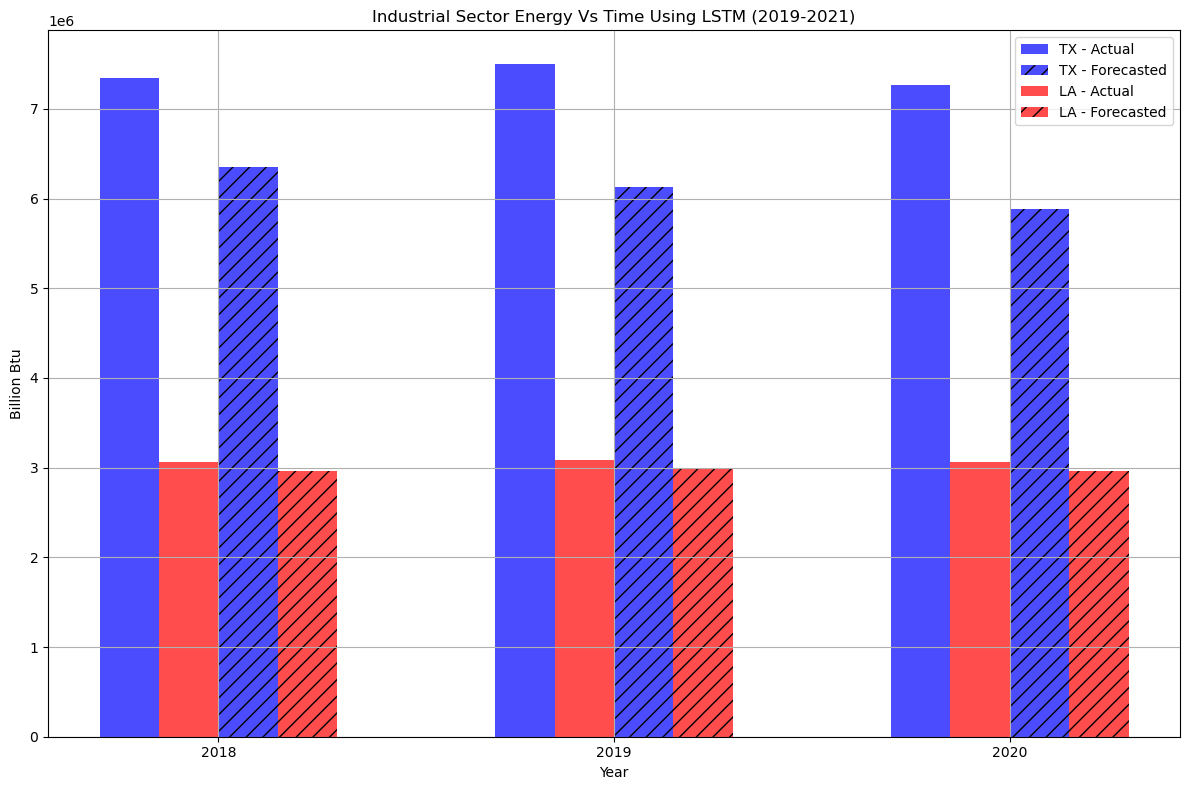

In [9]:
# list of state abbreviations 
state_abbreviations =  ['TX','LA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Industrial_T_60.iloc[-3:]
years_forecast = selected_years

# width of the bars
bar_width = 0.15

# colors for each state
state_colors = {'TX': 'blue', 'LA': 'red'}

# bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Industrial Sector Energy Vs Time Using LSTM (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### GRU

In [10]:
# sequence length and accuracy threshold
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {} 

for state in ['TX','LA']:
    # Extract the data for the selected state
    data = Industrial.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include training data
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_gru = []
    actual_values_gru = []
    predictions_gru = []

    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)

            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)

    # Calculate the root mean squared error (RMSE)
    rmse_gru = np.sqrt(mse_gru)

    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Industrial.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 361ms/step
Epoch 1/20
23/23 [==============================] - 2s 9ms/step - loss: 0.2914
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 4/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0203
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 8/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 10/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 11/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 12/20
23/23 [==============================] - 0s 10ms/step - loss:

32/32 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 2/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 3/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 4/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 5/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 6/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 7/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 8/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 9/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 10/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0118
Epoch 11/20
33/33 [==============================] - 0s 9ms/step - loss: 0.

42/42 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 18/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 19/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 20/20
1/1 [==============================] - 0s 13ms/step
Epoch 1/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 2/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 3/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 4/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 5/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 6/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 7/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 8/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 9/20
43/43 [==============================] - 0s 9ms/step - loss: 0.

52/52 [==============================] - 1s 9ms/step - loss: 0.0060
Epoch 16/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 17/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 18/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 19/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0056
Epoch 2/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0055
Epoch 3/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0054
Epoch 4/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0059
Epoch 5/20
53/53 [==============================] - 1s 12ms/step - loss: 0.0063
Epoch 6/20
53/53 [==============================] - 1s 9ms/step - loss: 0.0075
Epoch 7/20
53/53 [==============================] - 0s 9ms/step - los

62/62 [==============================] - 1s 10ms/step - loss: 0.0060
Epoch 14/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0057
Epoch 15/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 16/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 17/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0053
Epoch 18/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0051
Epoch 19/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 20/20
1/1 [==============================] - 0s 398ms/step
Epoch 1/20
23/23 [==============================] - 3s 11ms/step - loss: 0.6297
Epoch 2/20
23/23 [==============================] - 0s 11ms/step - loss: 0.2314
Epoch 3/20
23/23 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 4/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0092
Epoch 5/20
23/23 [==============================] - 0s 11ms/step 

32/32 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 9/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 10/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 11/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 12/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 13/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 14/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 15/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 16/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 17/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0056
Epoch 18/20
32/32 [==============================] - 0s 13ms/step - loss: 0.0051
Epoch 19/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 20/20
1/1 [==============================] 

42/42 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 7/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 8/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 9/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 10/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 11/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 12/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 13/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 14/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 15/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 16/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 17/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 18/20
42/42 [==============================] -

52/52 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 5/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 6/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 7/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 8/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 9/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 10/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 11/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 12/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 13/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 14/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 15/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 16/20
52/52 [==============================] - 0s 7

62/62 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 3/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 4/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 5/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 6/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 7/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 8/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 9/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 10/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 11/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 12/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 13/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 14/20
62/62 [==============================] - 0s 7ms

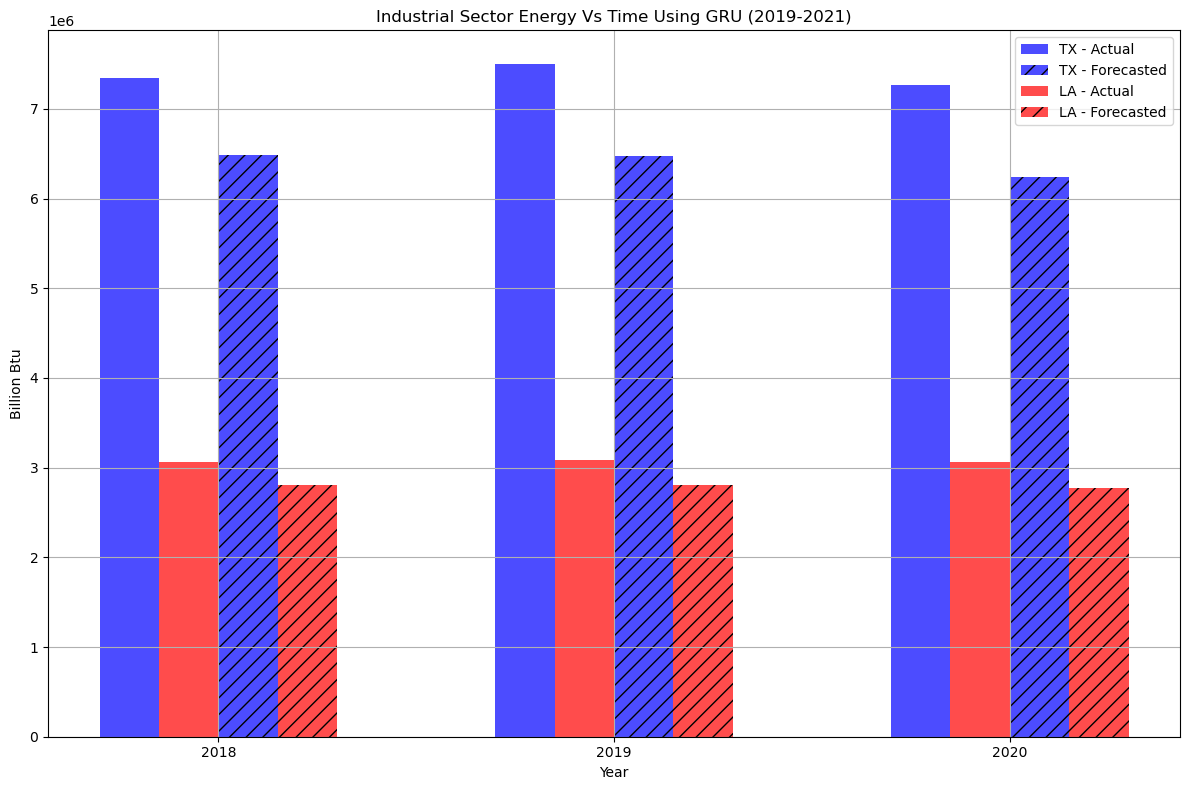

In [11]:
# list of state abbreviations 
state_abbreviations =  ['TX','LA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Industrial_T_60.iloc[-3:]
years_forecast = selected_years

# width of the bars
bar_width = 0.15

# colors for each state
state_colors = {'TX': 'blue', 'LA': 'red'}

# bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Industrial Sector Energy Vs Time Using GRU (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### CNN

In [12]:
# sequence length and accuracy threshold
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  

for state in ['TX','LA']:
    # Extract the data for the selected state
    data = Industrial.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include training data
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022 and 2023
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Industrial.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 204ms/step
Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 0.1951
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0332
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0282
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 8/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 11/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 12/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0

32/32 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 11/20
33/33 [==============================] - 0s 2ms/step - loss: 0.00

42/42 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 18/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 19/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 2/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 3/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 6/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 7/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 8/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 9/20
43/43 [==============================] - 0s 2ms/step - loss: 0.00

52/52 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 16/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 17/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 18/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 19/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 2/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 3/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 4/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 5/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 6/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 7/20
53/53 [==============================] - 0s 2ms/step - loss: 0.

62/62 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 14/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 15/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 16/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 17/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 18/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 19/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 20/20
1/1 [==============================] - 0s 118ms/step
Epoch 1/20
23/23 [==============================] - 1s 2ms/step - loss: 0.1968
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss:

32/32 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 18/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 20/20
1/1 [==============================] - 0s

42/42 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 9/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 10/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 11/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 12/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 13/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 14/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 15/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 16/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 17/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 18/20
42/42 [==============================] - 0s

52/52 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 5/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 6/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 9/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 11/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 12/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 13/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 14/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 15/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 16/20
52/52 [==============================] - 0s 3

62/62 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 9.9821e-04
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 9.5843e-04
Epoch 10/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 11/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 13/20
62/62 [==============================] -

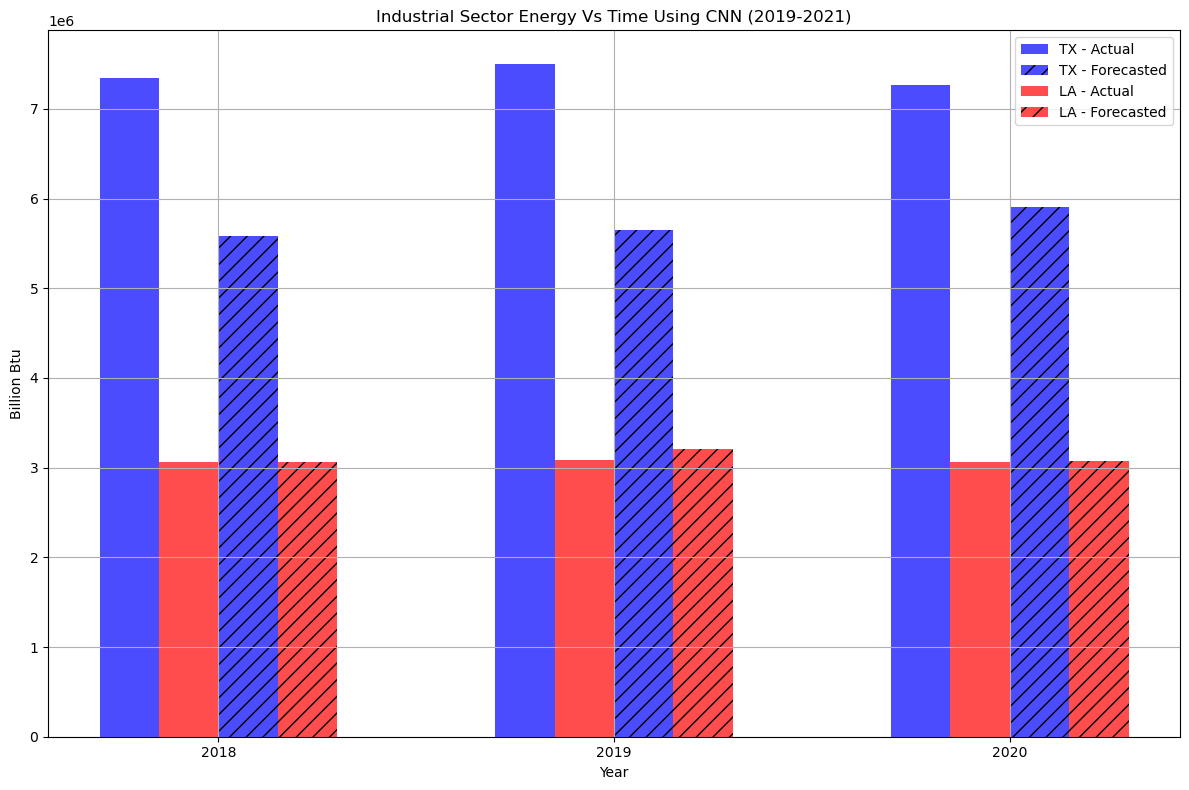

In [13]:
# list of state abbreviations 
state_abbreviations =  ['TX','LA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Industrial_T_60.iloc[-3:]
years_forecast = selected_years

# width of the bars
bar_width = 0.15

# colors for each state
state_colors = {'TX': 'blue', 'LA': 'red'}

# bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Industrial Sector Energy Vs Time Using CNN (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

## Machine Learning Forecasting

### ARIMA

In [21]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    # split the training data
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    # model 
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    # forecast value
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    # mse and rmse 
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    # Forecasting 
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['TX','LA']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Industrial.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    # arima accuracy dictanary 
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }

# Print the actual and forecasted values for each year and accuracy for each state
for state in selected_states:
    print(f"\n{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")



# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for all states (ARIMA):")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for all states (ARIMA):")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")




TX - Forecasted Values for 2022 and 2023:
2022: 3049627.74
2023: 3062024.01
Accuracy for TX (ARIMA) - 2019: 68.73%
Accuracy for TX (ARIMA) - 2020: 70.67%
Accuracy for TX (ARIMA) - 2021: 71.50

LA - Forecasted Values for 2022 and 2023:
2022: 3049627.74
2023: 3062024.01
Accuracy for LA (ARIMA) - 2019: 96.43%
Accuracy for LA (ARIMA) - 2020: 97.89%
Accuracy for LA (ARIMA) - 2021: 98.60

Forecasted Values for 2022 and 2023 (ARIMA):
Forecasts for 2022:
TX: 5268907.12
LA: 3049627.74
Forecasts for 2023:
TX: 5286593.20
LA: 3062024.01

Mean Squared Error (MSE) for all states (ARIMA):
MSE for TX (ARIMA): 1895811719280.62
MSE for LA (ARIMA): 38071744381.36

Root Mean Squared Error (RMSE) for all states (ARIMA):
RMSE for TX (ARIMA): 1376884.79
RMSE for LA (ARIMA): 195119.82


In [11]:
# Create the initial DataFrame
df_combined_results = pd.DataFrame({
    'State': list(mse_arima_dict.keys()),
    'MSE_lstm': list(state_mse_lstm.values()),
    'RMSE_lstm': list(state_rmse_lstm.values()),
    'Forecast_2022_lstm': [state_forecasts_lstm[state]['2022'] for state in state_forecasts_lstm],
    'Forecast_2023_lstm': [state_forecasts_lstm[state]['2023'] for state in state_forecasts_lstm],
    'MSE_cnn': list(state_mse_cnn.values()),
    'RMSE_cnn': list(state_rmse_cnn.values()),
    'Forecast_2022_cnn': [state_forecasts_cnn[state]['2022'] for state in state_forecasts_cnn],
    'Forecast_2023_cnn': [state_forecasts_cnn[state]['2023'] for state in state_forecasts_cnn],
    'MSE_gru': list(state_mse_gru.values()),
    'RMSE_gru': list(state_rmse_gru.values()),
    'Forecast_2022_gru': [state_forecasts_gru[state]['2022'] for state in state_forecasts_gru],
    'Forecast_2023_gru': [state_forecasts_gru[state]['2023'] for state in state_forecasts_gru],
    'MSE_arima': [mse_arima_dict[state] for state in selected_states],
    'RMSE_arima': [rmse_arima_dict[state] for state in selected_states],
    'Forecast_2022_arima': [forecast_years_arima_dict[state][2][0] for state in selected_states],
    'Forecast_2023_arima': [forecast_years_arima_dict[state][3][0] for state in selected_states],
})
# Save the combined DataFrame to a CSV file
df_combined_results.to_csv('combined_results_industrial.csv', index=False)

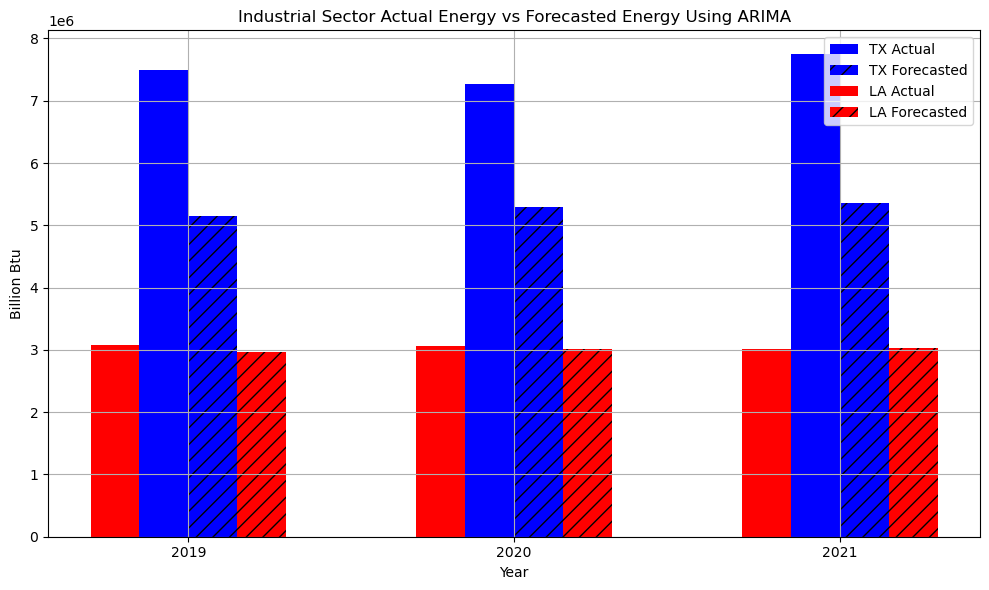

In [25]:
# colors for each state
state_colors = {'TX': 'blue', 'LA': 'red'}

# Create a figure
plt.figure(figsize=(10, 6))

# width of the bars and the space between bar groups
bar_width = 0.15
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Industrial.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten()  # Flatten the forecasted data

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Industrial Sector Actual Energy vs Forecasted Energy Using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
